<center> <h2>The University of British Columbia</h2> </center>
<center> <h2>Earth and Ocean Sciences 354</h2> </center>
<center> <h3>Geophysical Time Series Analysis</h3> </center>
<center> <h3>Problem Set # 5</h3> </center>

*Due: October 12, 2020*

Learning Goals:
* Interpret the amplitude and phase spectra of a Fourier transform
* Verify properties of the DFT through plotting

1. Consider the periodic box car function defined by
    $$ b_k =   \left\{
\begin{array}{ll}
      1 & 0 \le k < M \\
      0 & M \le k < N \\
\end{array} 
\right.  $$
Use the Python `np.fft.fft` command to determine the amplitude $R_n = \lvert B_n \rvert$ and phase spectrum $\Phi_n = \mathrm{atan}2\frac{\mathcal{I}(B_n)}{\mathcal{R}(B_n)}$ of $b_k$ for $N = 64$ and $M = 1,2,4,8,16,32,64$. The `np.fft.fft` command delivers the DFT $B_n$ of $b_k$ from $\omega_n = 0,\frac{2{\pi}}{T},\frac{4{\pi}}{T},\frac{6{\pi}}{T},...,\frac{2{\pi}(N-1)}{T}$ where $T = N{\Delta}t$. Because of the periodicity of the DFT/IDFT, it is often convenient to think of the first $\frac{N}{2}$ elements of $B_n$ as representing "positive" frequencies, the last $\frac{N}{2}$ elements of $B_n$ as representing "negative" frequencies, and shifting the plot so that 0 frequency lies in the middle. You can do this using `np.fft.fftshift` and the following commands e.g.:
```python
Bn = np.fft.fft(bk, 64)
Rn = np.abs(Bn)
wn = np.arange(-32, 32, 1)*2*np.pi/N
plt.plot(wn, np.fft.fftshift(Rn))
plt.xlabel("Radial Frequency (radians)")
```
where we have assumed that ${\Delta}t = 1$. What do you notice about the width of the central peak of the amplitude spectrum relative to the width of the boxcar for the different values of $M$ What do you notice about the phase spectrum? Use the `plt.subplot` command when you plot. Please hand in your scripts, plots, and associated comments. 

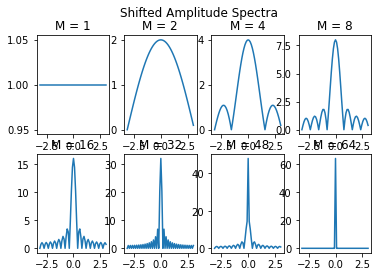

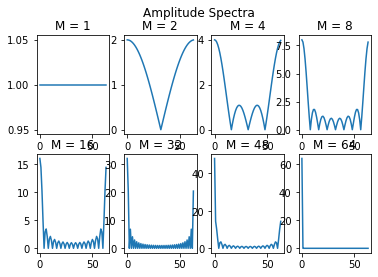

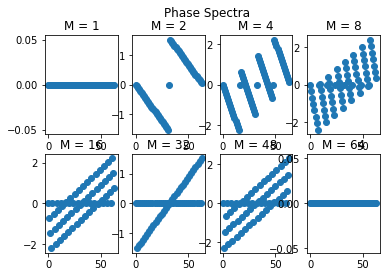

In [2]:
import matplotlib.pyplot as plt
import numpy as np


# QUESTION 1

N = 64
M = [1, 2, 4, 8, 16, 32, 48, 64] #I added 48 to fill out the subplots
Bn = []

for i in M:
    Bn.append(np.fft.fft(i*[1], N))

amps = []
phases = []
imaginary = []

for i in Bn:
    amps.append(abs(i))
    phases.append(np.arctan2(i.imag, i.real))

wn = np.arange(-32, 32, 1)*2*np.pi/N

fig1, shiftPlots = plt.subplots(2, 4)
fig2, ampPlots = plt.subplots(2, 4)
fig3, phasePlots = plt.subplots(2, 4)

c = 0
for i in range(2):
    for j in range(4):
        if c <= 7:
            shiftPlots[i, j].plot(wn, np.fft.fftshift(amps[c]))
            shiftPlots[i, j].set_title('M = ' + str(M[c]))
            fig1.suptitle("Shifted Amplitude Spectra")
            ampPlots[i, j].plot(amps[c])
            ampPlots[i, j].set_title('M = ' + str(M[c]))
            fig2.suptitle("Amplitude Spectra")
            phasePlots[i, j].scatter(np.arange(64), phases[c])
            phasePlots[i, j].set_title('M = ' + str(M[c]))
            fig3.suptitle("Phase Spectra")
            c += 1

plt.show()

2. Consider the discrete function defined by
    $$ b_k =   \left\{
\begin{array}{ll}
      1 & 0 \le k < 8 \\
      -1 & 8 \le k < 16 \\
      0 & 16 \le k < 64 \\
\end{array} 
\right.  $$
Use the Python `np.fft.fft` and `np.fft.ifft` commands to verify the following properties of the Discrete Fourier Transform. In each case transform $b_k$ into $B_n$, perform the appropriate frequency domain operation, and inverse transform back to time. Show your results in the time domain and describe the effect of the operation. Assume that the sample interval ${\Delta}t = 1.0$s. Note also that the ordering of frequencies ${\omega}_n$ assumed in using the `np.fft.fft`/`np.fft.ifft` commands is `omegan = np.fft.fftfreq(N, deltat)*2*np.pi` where in this case $N = 64$. Use the `plt.subplot` commands to keep paper cost to a minimum and make sure to provide copies of your Python scripts for evaluation.  

<html>
<ol start="1", style = "list-style-type:lower-alpha;">
    <li>Shift property. Shift $b_k$ by 10 s and 58 s and comment on your results.</li>
</ol>
</html>
$$a_{k-m} \leftrightarrow A_ne^{-i{\omega}_n{\Delta}tm} = A_ne^{-\frac{2{\pi}inm}{N}}$$  

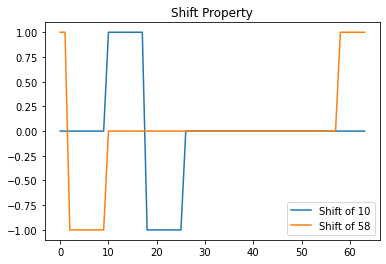

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# QUESTION 2

N = 64

bk = 8*[1] + 8*[-1] + 48*[0]
Bn = np.fft.fft(bk)


# 2.A.

def shift(Bn, s, N):
    BnShift = []
    for i in range(N):
        BnShift.append(Bn[i]*(np.exp(-(2*np.pi*(1j)*i*s)/N)))
    bkShift = np.fft.ifft(BnShift)
    return bkShift

plt.plot(np.real(shift(Bn, 10, N)))
plt.plot(np.real(shift(Bn, 58, N)))
plt.title("Shift Property")
plt.legend(["Shift of 10", "Shift of 58"])
plt.show()

<html>
<ol start="2", style = "list-style-type:lower-alpha;">
    <li>Time reversal. Time reverse $b_k$.</li>
</ol>
</html>
$$a_{N-k} \leftrightarrow A_n^*$$  

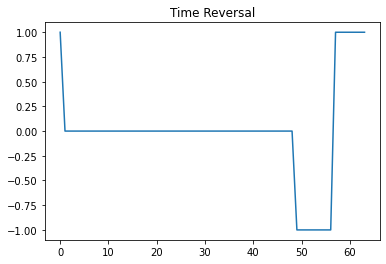

In [4]:
# 2.B.

BnTimeReversal = np.conj(Bn)
bkTimeReversal = np.fft.ifft(BnTimeReversal)

plt.plot(np.real(bkTimeReversal))
plt.title("Time Reversal")
plt.show()

<html>
<ol start="3", style = "list-style-type:lower-alpha;">
    <li>Convolution. Convolve $b_k$ with itself in the frequency domain. Compare the result with the time domain convolution function you implemented in assignment 2. Is it necessary to zero-pad $b_k$ when performing the frequency domain convolution?</li>
</ol>
</html>
$$a_k * a_k \leftrightarrow A_nA_n$$  

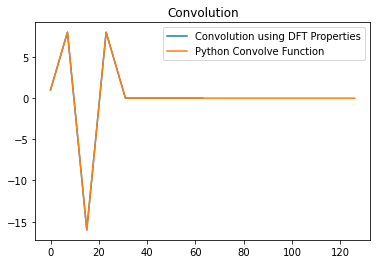

In [5]:
# 2. C.

BnConvolution = Bn*Bn
bkConvolution = np.fft.ifft(BnConvolution)

plt.plot(np.real(bkConvolution))
plt.plot(np.convolve(bk, bk)) #comparing to the python convolution
plt.title("Convolution")
plt.legend(["Convolution using DFT Properties", "Python Convolve Function"])
plt.show()

<html>
<ol start="4", style = "list-style-type:lower-alpha;">
    <li>Differentiation. Differentiate $b_k$.</li>
</ol>
</html>
$$\frac{da_k}{dt} \leftrightarrow i{\omega}_nA_n$$  

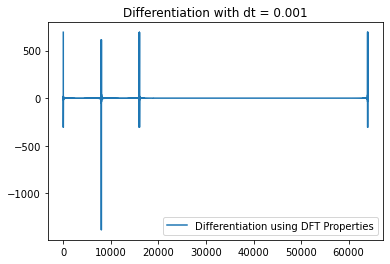

In [30]:
### 2. D.

# Redefining N for this question to allow a smaller delta t. Explained more in the pdf.
T = 64
sampersec = 1000
N = sampersec*T
deltat = 1/sampersec

#bk = np.sin(np.linspace(0, 2*np.pi, N)) #This is the plot I used in my explanation
bk = 8*sampersec*[1] + 8*sampersec*[-1] + 48*sampersec*[0]
Bn = np.fft.fft(bk)

#omegan = (np.concatenate([np.arange(0, N/2), np.arange(-N/2, 0)]))*(2*np.pi/(N*deltat))
omegan = np.fft.fftfreq(N, deltat)*2*np.pi

BnDifferentiation = (1j)*omegan*Bn
bkDifferentiation = np.fft.ifft(BnDifferentiation)

plt.plot(np.real(bkDifferentiation))
#plt.plot(np.diff(bk)/deltat) #differentiation calculation for comparison
plt.title("Differentiation with dt = 0.001")
plt.legend(["Differentiation using DFT Properties", "Python Differentiation Function"])
plt.show()

<html>
<ol start="5", style = "list-style-type:lower-alpha;">
    <li>Integration. Integrate $b_k$ (you may zero out the value of $B_n$ at zero frequency).</li>
</ol>
</html>
$$\int{a_k}dt \leftrightarrow \frac{A_n}{i{\omega}_n}$$  

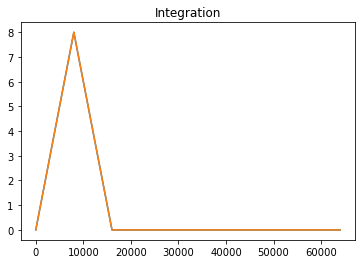

In [5]:
### 2. E.

BnIntegration = []

for i in range(N):
    if(omegan[i] != 0): #if omega is 0, we cannot do the division or we get nan
        BnIntegration.append(Bn[i]/((1j)*omegan[i]))
    else:
        BnIntegration.append(N)

bkIntegration = np.fft.ifft(BnIntegration)

plt.plot(np.real(bkIntegration))
plt.plot(np.cumsum(bk)*deltat) #integration calculation for comparison
plt.title("Integration")
plt.show()

<html>
<ol start="6", style = "list-style-type:lower-alpha;">
    <li>Parseval's theorem. Verify Parseval's theorem for $b_k$. Feel free to take advantage of the built-in Python `np.sum` function to avoid using for loops for the below simple sums of all the terms in each series.</li>
</ol>
</html>
$$\frac{1}{N}\sum_{k=0}^{N-1}\lvert a_k \rvert^2 \leftrightarrow \sum_{n=0}^{N-1}\lvert A_n \rvert^2$$

In [6]:
### 2. F.
#this also works with the redefined N and bk, but I switched it back because a smaller delta t is not necessary
N = 64

bk = 8*[1] + 8*[-1] + 48*[0]
Bn = np.fft.fft(bk)

BnParseval = np.sum(abs(Bn)**2)
bkParseval = np.fft.ifft([BnParseval])

print(bkParseval)
print(N*(np.sum(abs(np.array([bk]))**2)))


[1024.+0.j]
1024
